# **Importing Libraries**

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from imblearn.combine import SMOTEENN
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Reading Dataset**


Since we tried 2 different cleaning approaches, the following notebook is divided into dataset A and B approach. **BOTH DATASET REFER TO SAME DATA**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Project - Rain in Australia/weatherAUS.csv") #for datasetB

In [ ]:
a = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weatherAUS.csv') ##for dataset A

# **Data Exploration**

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
a.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
a.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
a['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

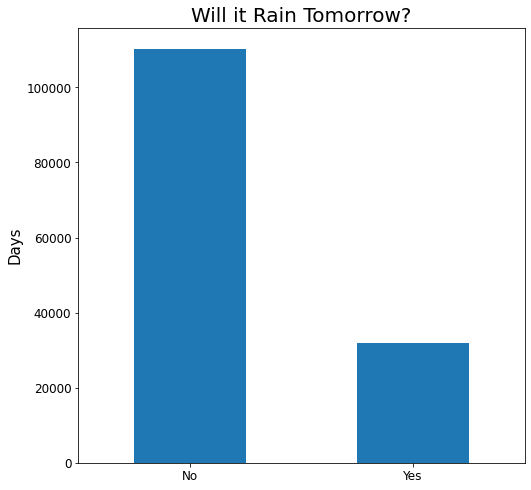

In [ ]:
plt.figure(figsize=(8,8))
a['RainTomorrow'].value_counts().plot(kind='bar')
plt.title('Will it Rain Tomorrow?', size=20);
plt.ylabel('Days', size=15)
plt.xticks(rotation=360)

Text(0.5, 1.0, 'Missing value percentages in data')

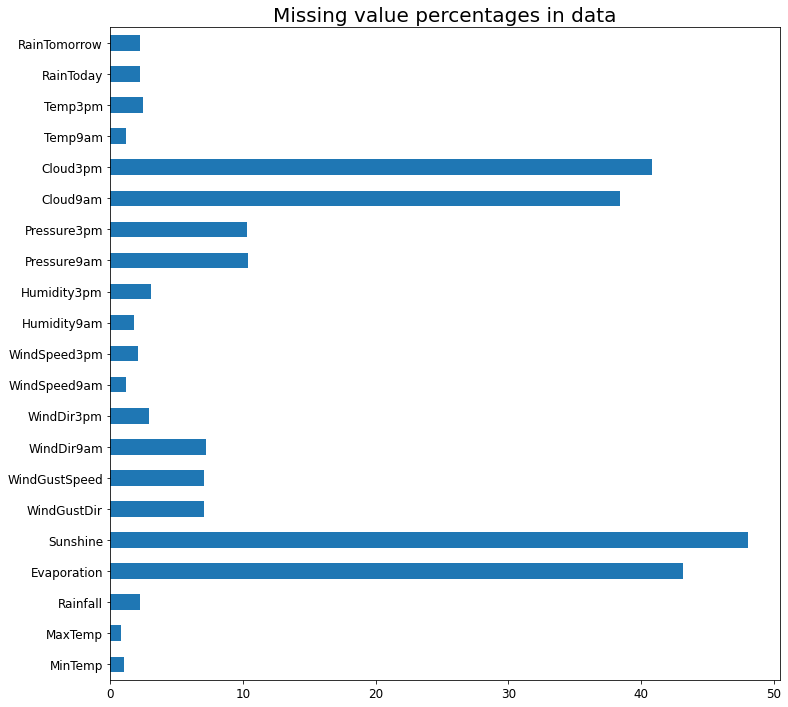

In [ ]:
plt.figure(figsize=(12,12))

missing_values_a = a.isna().sum()/len(a)*100
missing_values_a = missing_values_a[missing_values_a!=0]

missing_values_a.plot(kind='barh')
plt.title('Missing value percentages in data', size=20)

# **Data Cleaning**

**DATASET A & B REFER TO SAME DATA BUT DIFFERENT CLEANING TECHNIQUES HAVE BEEN USED ON EACH TO BUILD A MODEL.**

Dataset A drop columns with missing values greated than 30% and rows less than 5%. Remaining values are filled with median and mode by Month.


### **Dataset A**

In [ ]:
# # As a guideline
# <5% - simply drop the rows
# 5-14% fill the missing values by mean or median
# 15-30% fill in missing values by KNN Imputer
# >30% - too much missing values, simply drop the feature/columns

#lets filter columns based on their percentage missing value and then apply the fillna techniques
missing_col_5 = []
missing_col_5_30 = []
missing_col_30 = []
for i in range(len(missing_values_a.index)):
    if missing_values_a[i]<5:
      missing_col_5.append(missing_values_a.index[i])
    elif missing_values_a[i]<30:
      missing_col_5_30.append(missing_values_a.index[i])
    else:
      missing_col_30.append(missing_values_a.index[i])
print('Missing values less than 5%:\n' ,missing_col_5)
print('Missing values between 5 and 30%:\n' ,missing_col_5_30)
print('Missing values greater than 30%:\n' ,missing_col_30)

Missing values less than 5%:
 ['MinTemp', 'MaxTemp', 'Rainfall', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']
Missing values between 5 and 30%:
 ['WindGustDir', 'WindGustSpeed', 'WindDir9am', 'Pressure9am', 'Pressure3pm']
Missing values greater than 30%:
 ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']


In [ ]:
#lets drop the columns with more than 30% missing values:
a = a.drop(labels=missing_col_30,axis=1)

## drop rows with less than 5% of the missing values
a = a.dropna(axis=0, subset=missing_col_5)

print(a.shape)

(134590, 19)


In [ ]:
###convert pandas date to datetime
a['Date'] = pd.to_datetime(a['Date'])

###create month and year columns
a['month'] = a['Date'].dt.month
a['year'] = a['Date'].dt.year

Checking for the outliers in missing data. If our Data is prone to outliers which means it contains good amount of outliers in that we will not choose Mean as it will implicitly contain information of outliers. We will choose median and mode instead

If the amount of outliers are not significant choose Mean

Text(0.5, 1.0, '')

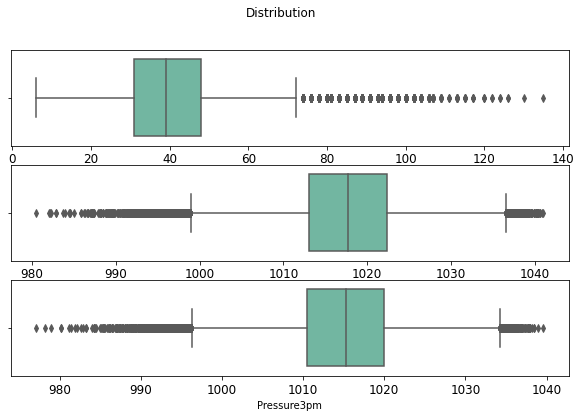

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(10, 6), sharey=False)
fig.suptitle('Distribution')

# WindGustSpeed
sns.boxplot(x="WindGustSpeed", data = a, palette = 'Set2', ax = axes[0])
axes[0].set_title("")

# Pressure9am
sns.boxplot(x= 'Pressure9am', data = a, palette = 'Set2', ax = axes[1])
axes[1].set_title("")

# Pressure3pm
sns.boxplot(x= 'Pressure3pm', data = a, palette = 'Set2', ax = axes[2])
axes[2].set_title("")

In [ ]:
#### fill values by mode and mean by month

f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else x.mode().iloc[0]

for col in missing_col_5_30:
    a[col] = a[col].fillna(a.groupby('month')[col].transform(f))

In [ ]:
#lets replace the RainToday and RainTomorrow variables with binary values
a['RainToday'] = a['RainToday'].map({'Yes': 1, 'No': 0})
a['RainTomorrow'] = a['RainTomorrow'].map({'Yes': 1, 'No': 0})

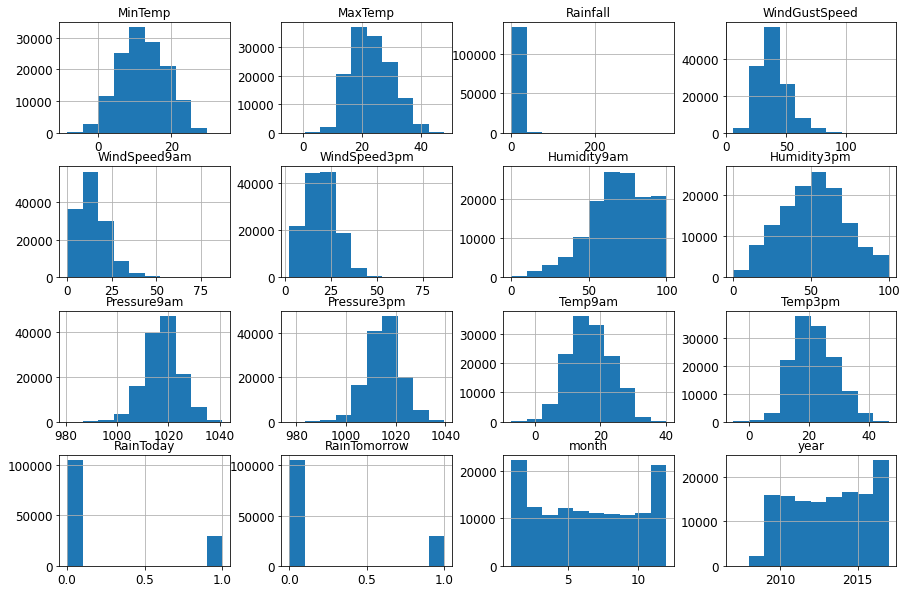

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
a.hist();

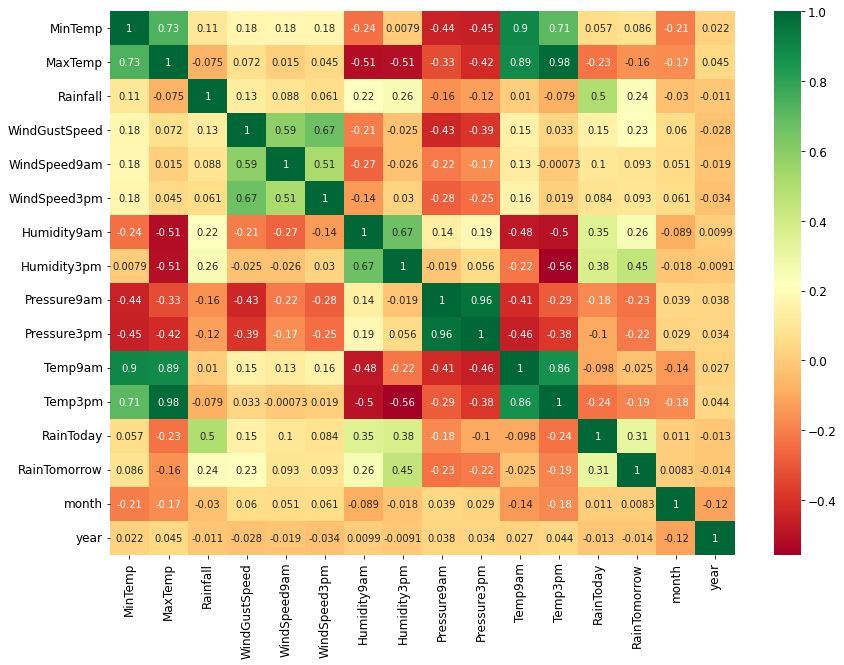

In [ ]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = a.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,10))
#plot heat map
g=sns.heatmap(a[top_corr_features].corr(),annot=True,cmap="RdYlGn")

As we can see from the correlation matrix, some features are highly correlated to each other such as MinTemp<-->Temp9am and MaxTemp<-->Temp3pm or Pressure9am<-->Pressure3pm

Lets drop the highly correlated features

In [ ]:
#lets drop the columns with more than 30% missing values:
a = a.drop(labels=['Temp9am','Temp3pm','Pressure3pm'],axis=1)

In [ ]:
# Let's covert to categorical variables
location_a=pd.get_dummies(a['Location'],drop_first=True)
WindGustDira = pd.get_dummies(a['WindGustDir'],drop_first=True)
WindDir9ama = pd.get_dummies(a['WindDir9am'],drop_first=True)
WindDir3pma = pd.get_dummies(a['WindDir3pm'],drop_first=True)

## Drop Categorical Features
a=a.drop(['Location','WindGustDir','WindDir9am','WindDir3pm'],axis=1)

In [ ]:
a=pd.concat([a,location_a,WindGustDira,WindDir9ama,WindDir3pma],axis=1)

In [ ]:
a.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow,month,year,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,2008-12-01,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,0,0,12,2008,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,0,0,12,2008,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,0,0,12,2008,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,0,0,12,2008,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,0,0,12,2008,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
### remove the date, month and year
a=a.drop(['Date','month','year'],axis=1)

In [ ]:
a.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### **Dataset B**

For Dataset B, all missing valued rows are dropped.

In [ ]:
b = df.drop(columns=["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"])
b = b.dropna()
b["Date"] = pd.to_datetime(b["Date"])
b["RainToday"] = b["RainToday"].map(dict(Yes=1, No=0))
b["RainTomorrow"] = b["RainTomorrow"].map(dict(Yes=1, No=0))

In [ ]:
one_hot_Location = pd.get_dummies(b["Location"])
b = b.drop(columns="Location")
b = b.join(one_hot_Location)

b["WindDir9am"] = "WindDir9am" + b["WindDir9am"]
b["WindDir3pm"] = "WindDir3pm" + b["WindDir3pm"]

one_hot_WindGustDir = pd.get_dummies(b["WindGustDir"])
b = b.drop(columns="WindGustDir")
b = b.join(one_hot_WindGustDir)

one_hot_WindDir9am = pd.get_dummies(b["WindDir9am"])
b = b.drop(columns="WindDir9am")
b = b.join(one_hot_WindDir9am)

one_hot_WindDir3pm = pd.get_dummies(b["WindDir3pm"])
b = b.drop(columns="WindDir3pm")
b = b.join(one_hot_WindDir3pm)

b = b.drop(columns="Date")

# **Feature Scaling**

### **Dataset B**

In [ ]:
bX = b.drop('RainTomorrow', axis=1)
by = b['RainTomorrow']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
rescaledX = scaler.fit_transform(bX[["MinTemp","MaxTemp","Rainfall","WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Temp9am","Temp3pm"]])

# **Balancing Dataset**

### **Dataset A**

In [ ]:
a_majority = a[a['RainTomorrow']==0]
a_minority = a[a['RainTomorrow']==1]

a_majority_upsample = resample(a_majority, 
                                 replace=True,     
                                 n_samples=len(a.loc[a['RainTomorrow'] == 0]),    
                                 random_state=123) 
a_minority_upsample = resample(a_minority, 
                                 replace=True,     
                                 n_samples=len(a.loc[a['RainTomorrow'] == 0]),    
                                 random_state=123) 
a_new = pd.concat([a_majority_upsample, a_minority_upsample])

In [ ]:
a.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


Seperate independent and dependent variable for training

In [ ]:
# #Get the Independent and Dependent Features
Xa=a_new.drop('RainTomorrow', axis=1)
Ya=a_new['RainTomorrow']

### **Feature Scaling on Balanced Dataset A**

In [ ]:
#Feature Scaling using Standard Scaler on Dataset A
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_a = sc.fit_transform(Xa)

In [ ]:
##separate into train and test models

xr_train_a,xr_test_a,yr_train_a,yr_test_a=train_test_split(x_a, Ya,test_size=0.3,random_state = 42)

### **Dataset B**

In [ ]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state=42)
X_resampled1, y_resampled1 = sm.fit_resample(bX,by)

In [ ]:
bX_train, bX_test, by_train, by_test = train_test_split(X_resampled1, y_resampled1, test_size=0.2,random_state=42)

In [ ]:
y_resampled1.value_counts()

1    80857
0    55640
Name: RainTomorrow, dtype: int64

# **Training the model**

### **Model training on Dataset A**

In [ ]:
def evaluate(model):
    model_a = model.fit(xr_train_a,yr_train_a)
    accuracy=model.score(xr_test_a,yr_test_a)
    
    print('model name ',model)
    print('accuracy ',accuracy)

**DO NOT RUN THE BELOW CODE AGAIN. TOOK ALMOST AN HOUR THE FIRST TIME TO GET A BENCHMARK ACCURACY FOR DIFFERENT MODELS WITH DEFAULT SETTINGS**

In [ ]:
lr_a = LogisticRegression()
svm_a = SVC()
dt_a=DecisionTreeClassifier(max_depth=6)
rf_a=RandomForestClassifier(n_estimators=100,n_jobs=-1)
knn_a=KNeighborsClassifier(n_neighbors=5)
ada_a = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=50,random_state=42)
xgb_a = xgboost.XGBClassifier()

models=[lr_a, svm_a, dt_a, rf_a, knn_a, ada_a, xgb_a]

for model in models:
  evaluate(model)

model name  LogisticRegression()
accuracy  0.7811081844435277
model name  SVC()
accuracy  0.8402303957348227
model name  DecisionTreeClassifier(max_depth=6)
accuracy  0.7648122877725239
model name  RandomForestClassifier(n_jobs=-1)
accuracy  0.9584589508425629
model name  KNeighborsClassifier()
accuracy  0.8012757449779442
model name  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   random_state=42)
accuracy  0.7944209958427216
model name  XGBClassifier()
accuracy  0.7861064390212942


The above code was run with run initially with data balanced through SMOTENN whereby feature scaling was done before the balancing of data:

**model name**  LogisticRegression()
**accuracy**  0.8592431857936806

**model name**  SVC()
**accuracy** 0.9379359209972765

**model name** DecisionTreeClassifier(max_depth=6)
**accuracy** 0.8565197174678387

**model name**  RandomForestClassifier(n_jobs=-1)
**accuracy**  0.9404379691340257

**model name** KNeighborsClassifier()
**accuracy**  0.9362309855412616

**model name**  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),random_state=42)
**accuracy**  0.935633151030711

**model name**  XGBClassifier()
**accuracy**  0.902907247082789

As you can see the accuracies are severely reduced due to the balancing technique used

***But in both tests, Random Forest offers highest accuracy***

---



In [ ]:
rnd_clf_a = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rnd_clf_a.fit(xr_train_a,yr_train_a)

#n_estimators: no. of decision trees
#n_jobs: The number of jobs to run in parallel. None means 1 , -1 means using all processors
y_pred_rf_a = rnd_clf_a.predict(xr_test_a)
print('Accuracy for Random Forest with balanced data is ' ,round(accuracy_score(yr_test_a, y_pred_rf_a)*100,2), '%')

Accuracy for Random Forest with balanced data is  95.83 %


In [ ]:
result_rfa = classification_report(yr_test_a, y_pred_rf_a)
print(result_rfa)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     31379
           1       0.95      0.97      0.96     31643

    accuracy                           0.96     63022
   macro avg       0.96      0.96      0.96     63022
weighted avg       0.96      0.96      0.96     63022



In [ ]:
#Cross validating the model
cv_a = KFold(n_splits=10, random_state=42, shuffle=True)

scores_a = cross_val_score(rnd_clf_a, x_a, Ya, scoring='accuracy', cv=cv_a, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores_a), np.std(scores_a)))

Accuracy: 0.973 (0.001)


In [ ]:
scores_a

array([0.97262947, 0.9738195 , 0.97281858, 0.97219974, 0.97139049,
       0.97115247, 0.97210454, 0.97181892, 0.97234255, 0.97515114])

The cross validation satisfies that the accuracy score is not deviating between different training and test sets.

### **Model Training on Dataset B**

In [ ]:
import xgboost
classifier=xgboost.XGBClassifier()
classifier.fit(bX_train,by_train)

XGBClassifier()

In [ ]:
xgboost_prediction = classifier.predict(bX_test)

In [ ]:
from sklearn.metrics import classification_report
result1 = classification_report(by_test, xgboost_prediction)
print(result1)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     17524
           1       0.76      0.50      0.60      5061

    accuracy                           0.85     22585
   macro avg       0.81      0.73      0.76     22585
weighted avg       0.84      0.85      0.84     22585



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
scores = cross_val_score(classifier,X_resample, by, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.854 (0.004)


In [ ]:
scores

array([0.85061543, 0.85433454, 0.85398034, 0.85203223, 0.85991322,
       0.84705987, 0.85954658, 0.85538434, 0.85494155, 0.85255048])

# **Hyper Parameter Optimization**

### **Dataset A**

In [ ]:
params_a = {    
    'bootstrap': [True],
    'max_depth': [80, 90, None],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200, 300]
    }

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
## Hyperparameter optimization using GridSearch
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

classifier_upsampled_a= RandomForestClassifier()

grid_search = GridSearchCV(estimator = classifier_upsampled_a, param_grid = params_a, 
                          cv = 3, n_jobs = -1, verbose = 2)

**DO NOT RUN THE BELOW CODE AGAIN. IT TOOK LONGER THAN AN HOUR TO EXECUTE!!!!**

In [ ]:
# random_search=RandomizedSearchCV(classifier_upsampled_a,param_distributions=params_a,
#                                  n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
grid_search.fit(xr_train_a, yr_train_a)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 72 candidates, totalling 216 fits

 Time taken: 1 hours 4 minutes and 29.03 seconds.


In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=90, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=300)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [ ]:
rnd_clf_hpo = RandomForestClassifier(bootstrap=True,max_depth=90, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=300,n_jobs=-1)
rnd_clf_hpo.fit(xr_train_a,yr_train_a)

#n_estimators: no. of decision trees
#n_jobs: The number of jobs to run in parallel. None means 1 , -1 means using all processors
y_pred_rf_hpo = rnd_clf_a.predict(xr_test_a)
print('Accuracy for Random Forest with HPO is ' ,round(accuracy_score(yr_test_a, y_pred_rf_hpo)*100,2), '%')

Accuracy for Random Forest with HPO is  95.83 %


Confusion Matrix:
[[29592  1787]
 [  843 30800]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     31379
           1       0.95      0.97      0.96     31643

    accuracy                           0.96     63022
   macro avg       0.96      0.96      0.96     63022
weighted avg       0.96      0.96      0.96     63022

Accuracy: 0.9582685411443623


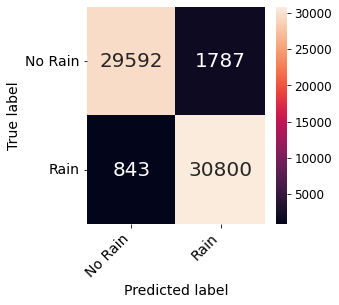

In [ ]:
#Next, we can get the accuracy score, confusion matrix and classification report as follows −
result_a = confusion_matrix(yr_test_a, y_pred_rf_hpo)
print("Confusion Matrix:")
print(result_a);
result_a1 = classification_report(yr_test_a, y_pred_rf_hpo)
print("Classification Report:",)
print (result_a1);
result_a2 = accuracy_score(yr_test_a,y_pred_rf_hpo)
print("Accuracy:",result_a2);

plt.rcParams["figure.figsize"] = (4,4);
confusion_matrix_df = pd.DataFrame(result_a, ('No Rain', 'Rain'), ('No Rain', 'Rain'));
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d");
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14);
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14);
plt.ylabel('True label', fontsize = 14);
plt.xlabel('Predicted label', fontsize = 14);

### **Dataset B**

In [ ]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.3)

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15, 20],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
classifier_new_smote=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier_new_smote,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X_resampled1, y_resampled1)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12, 15,
                                                      20],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=8,
              min_child_weight=5)

In [ ]:
classifier_smote=xgboost.XGBClassifier(colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=8,
              min_child_weight=5)

In [ ]:
classifier_smote.fit(X=xr_train1, y=yr_train1)
 
y_pred_lat = classifier_smote.predict(xr_test1)
print(classification_report(yr_test1, y_pred_lat))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     16735
           1       0.95      0.94      0.95     24215

    accuracy                           0.94     40950
   macro avg       0.93      0.94      0.93     40950
weighted avg       0.94      0.94      0.94     40950



In [ ]:
print(accuracy_score(yr_test1, y_pred_lat))

0.9366788766788767


# **Dimensionality Reduction**


### **Dataset A**

In [ ]:
#Applying PCA
# from sklearn.decomposition import KernelPCA
# pca_a = KernelPCA(0.90)
# X_train_a_kpca = kpca.fit_transform(xr_train_a)
# X_test_a_kpca = kpca.transform(xr_test_a)

from sklearn.decomposition import PCA
pca_a = PCA(0.95)
X_train_a_pca = pca_a.fit_transform(xr_train_a)
X_test_a_pca = pca_a.transform(xr_test_a)

In [ ]:
clf_a_pca = RandomForestClassifier(bootstrap=True,max_depth=90, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=300,n_jobs=-1)
clf_a_pca.fit(X_train_a_pca,yr_train_a)

#n_estimators: no. of decision trees
#n_jobs: The number of jobs to run in parallel. None means 1 , -1 means using all processors
y_pred_clf_pca = clf_a_pca.predict(X_test_a_pca)

print('Accuracy: ' +str(accuracy_score(yr_test_a, y_pred_clf_pca)))

Accuracy: 0.9361810161530894


### **Dataset B**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_train_pca = pca.fit_transform(xr_train1)
X_test_pca = pca.transform(xr_test1)

In [ ]:
classifier2=xgboost.XGBClassifier()
classifier2.fit(xr_train1,yr_train1)

XGBClassifier()

In [ ]:
y_pred_2 = classifier2.predict(xr_test1)

In [ ]:
print('Accuracy: ' +str(accuracy_score(yr_test1, y_pred_2)))

Accuracy: 0.9114285714285715
